## **利用geopandas进行矢量数据快速读、写、及可视化.**

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_kunming = 'data/Section-2/kunming_districts.shp'
path_kunming_out_1 = 'data/Section-4/vector_out_1.shp'
path_kunming_out_2 = 'data/Section-4/vector_out_2.shp'


### 1. 读入矢量数据

In [3]:
kunming_gpd = gpd.read_file(path_kunming)
kunming_gpd.head(10)


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045..."
2,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71717 25.03341, 102.71792 25.033..."
3,530112,西山区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,东川区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.80340 26.30291, 102.80537 26.303..."
5,530114,呈贡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.85321 24.69792, 102.85168 24.698..."
6,530115,晋宁区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.73979 24.81731, 102.74137 24.815..."
7,530124,富民县,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.63768 25.36767, 102.64085 25.367..."
8,530125,宜良县,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((103.27379 25.25786, 103.27332 25.255..."
9,530126,石林彝族自治县,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((103.66655 24.72420, 103.66542 24.723..."


### 2. 可视化矢量数据

<Axes: >

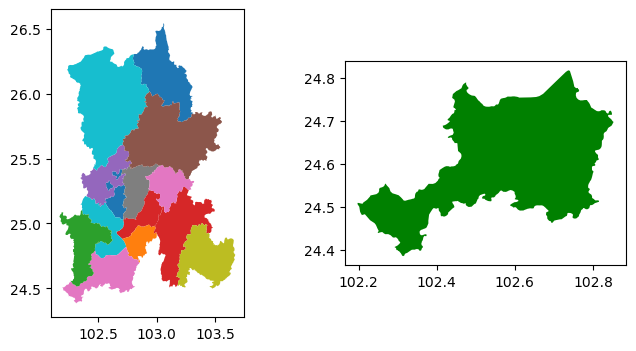

In [7]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
kunming_gpd.plot(ax=ax[0], column='dt_name')
kunming_chenggong_gpd = kunming_gpd.iloc[6:7]
kunming_chenggong_gpd.plot(ax=ax[1], color='green')


#### **3. 写出矢量文件**

#### 3.1 写出只含有特定字段(name)的矢量文件

In [8]:
kunming_out_1 = kunming_gpd[['dt_name', 'geometry']]
kunming_out_1.head()


,dt_name,geometry
0,五华区,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,盘龙区,"POLYGON ((102.71668 25.04473, 102.71663 25.045..."
2,官渡区,"POLYGON ((102.71717 25.03341, 102.71792 25.033..."
3,西山区,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,东川区,"POLYGON ((102.80340 26.30291, 102.80537 26.303..."


In [9]:
kunming_out_1.to_file(path_kunming_out_1)


#### 3.1 写出只含有特定特征（呈贡区）矢量文件


In [10]:
id_sel = np.where(kunming_gpd['dt_name']=='呈贡区')[0]
id_sel
kunming_out_2 = kunming_gpd.iloc[id_sel]


In [11]:
kunming_out_2.to_file(path_kunming_out_2)


### 验证写出结果

In [12]:
kunming_out_2 = gpd.read_file(path_kunming_out_2)
kunming_out_2


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530114,???,530100,???,530000,???,100000,???????,"POLYGON ((102.85321 24.69792, 102.85168 24.698..."
